# Important:

This notebook need some libraries in order to run. It runs with the standard packages that are installed for the intro to ML demos. Nevertheless, we provided a ```requirements.txt``` for your convenience.
  

### Imports


In [3]:
import numpy as np
import pandas as pd
import task3
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import importlib
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from sklearn.neural_network import MLPClassifier

### Preprocessing

In [5]:
importlib.reload(task3)

training_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

transformed_training_set = task3.transformInput(training_set)
transformed_test_set = task3.transformInput(test_set, test = True)

In [6]:
train_labels = transformed_training_set['Active'].values.astype(np.float32)
train_features = transformed_training_set.drop('Active', axis = 1).values.astype(np.float32)

### Model definition and training

In [7]:
classifier = MLPClassifier(random_state=0)

In [8]:
classifier.fit(train_features, train_labels)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Text(0, 0.5, 'error')

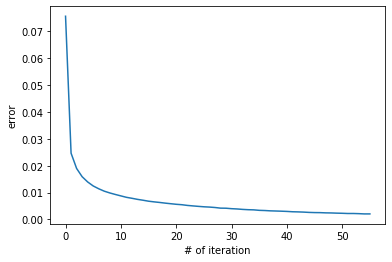

In [9]:
plt.plot(classifier.loss_curve_)
plt.xlabel('# of iteration')
plt.ylabel('error')


### Predictions and Export

In [10]:
y = classifier.predict(transformed_test_set.values)

In [11]:
import pandas as pd
df = pd.DataFrame(y)
print(df.shape)
df.to_csv('submission.csv', index=False, header=False)

(48000, 1)
